In [21]:
import pygad
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd

In [22]:
# Генерация случайных данных для 100 транспортных средств
vehicle_classes = np.random.choice(['A', 'B', 'C', 'D', 'E', 'F'], size=20)
imo = np.random.randint(low=9000000, high=9999999, size=20)
speeds = np.random.randint(low=0, high=20, size=20)
start_times = np.random.randint(low=0, high=30, size=20)
end_times = start_times + np.random.randint(low=1, high=30, size=20)
start_points = np.random.randint(low=0, high=3, size=20)
end_points = np.random.randint(low=0, high=4, size=20)
splach_coefficient_values = np.random.randint(low=0, high=10, size=20)

# Создание датасета с сгенерированными данными
vehicle_data = pd.DataFrame({
    'class': vehicle_classes,
    'imo': imo,
    'speed': speeds,
    'start_time': start_times,
    'end_time': end_times,
    'start_point': start_points,
    'end_point': end_points,
    'splach_coefficient_values': splach_coefficient_values
})
# Сохранение датасета в формате CSV
vehicle_data.to_csv('vehicles.csv', index=False)
print(vehicle_data)

   class      imo  speed  start_time  end_time  start_point  end_point  \
0      E  9599548      1           4        28            0          3   
1      E  9219152      0          16        22            0          1   
2      F  9172293     13          23        50            2          3   
3      B  9863867      5           3         9            2          2   
4      F  9629912     16          27        42            0          1   
5      E  9087612     16           0        11            2          3   
6      E  9953058      9          20        26            2          0   
7      B  9494245      8          14        20            1          1   
8      F  9796483     10          19        42            1          1   
9      D  9046613     13          25        47            0          2   
10     D  9754344      3           3        16            2          0   
11     D  9038224     13          17        31            1          0   
12     E  9636341     10          20  

In [23]:
# Чтение датасета с информацией о транспортных средствах
vehicle_data = pd.read_csv('vehicles.csv')
vehicle_speeds = {}
recommended_start_times = {}
recommended_end_times = {}
start_points = {}
end_points = {}
splach_coefficient_values = {}
for index, row in vehicle_data.iterrows():
    vehicle_class = row['class']
    imo_value = row['imo']
    speed = row['speed']
    start_time = row['start_time']
    end_time = row['end_time']
    start_point = row['start_point']
    end_point = row['end_point']
    splach_coefficient= row['splach_coefficient_values']
    vehicle_speeds[vehicle_class] = speed
    recommended_start_times[vehicle_class] = start_time
    recommended_end_times[vehicle_class] = end_time
    start_points[vehicle_class] = start_point
    end_points[vehicle_class] = end_point
    splach_coefficient_values[vehicle_class] = splach_coefficient

In [24]:
import datetime

vehicle_data1 = pd.read_csv('requests.csv')

# Замена всех значений в столбце 'A' равных 3 на значение 0 с использованием метода .loc[]
for i in range(0, 10):
    vehicle_data1.loc[vehicle_data1['Ледовый класс'] == 'Arc' + str(i), 'Ледовый класс'] = i
vehicle_data1.loc[vehicle_data1['Ледовый класс'] == 'No ice class', 'Ледовый класс'] = 0

for i in range(0, 10):
    vehicle_data1.loc[vehicle_data1['Пункт начала плавания'] == 'Саббета ' + str(i), 'Пункт начала плавания'] = i
    vehicle_data1.loc[vehicle_data1['Пункт окончания плавания'] == 'Саббета ' + str(i), 'Пункт окончания плавания'] = i
    vehicle_data1.loc[vehicle_data1['Пункт начала плавания'] == 'Сабетта ' + str(i), 'Пункт начала плавания'] = i
    vehicle_data1.loc[vehicle_data1['Пункт окончания плавания'] == 'Сабетта ' + str(i), 'Пункт окончания плавания'] = i
vehicle_data1.loc[vehicle_data1['Пункт начала плавания'] == 'точка в Баренцевом море', 'Пункт начала плавания'] = 4
vehicle_data1.loc[vehicle_data1['Пункт окончания плавания'] == 'точка в Баренцевом море', 'Пункт окончания плавания'] = 4

# Переименование столбцов
vehicle_data1 = vehicle_data1.rename(columns={'Наименование': 'name', 'Пункт начала плавания': 'start_point', 'Пункт окончания плавания': 'end_point', 'IMO': 'imo', 'Ледовый класс': 'class', 'Скорость, уз': 'speed', 'Дата и время начала плавания': 'start_time', 'Дата и время окончания плавания': 'end_time'})

# Преобразование столбца datetime в формат datetime
vehicle_data1['start_time'] = pd.to_datetime(vehicle_data1['start_time'])
# Перевод столбца datetime в формат Unix-времени
vehicle_data1['start_time'] = (vehicle_data1['start_time'] - datetime.datetime(1970, 1, 1)).astype(int) // 10**9

# Преобразование столбца datetime в формат datetime
vehicle_data1['end_time'] = pd.to_datetime(vehicle_data1['end_time'])
# Перевод столбца datetime в формат Unix-времени
vehicle_data1['end_time'] = (vehicle_data1['end_time'] - datetime.datetime(1970, 1, 1)).astype(int) // 10**9


vehicle_data = vehicle_data1
print(vehicle_data1)

                name      imo class  speed start_point end_point  start_time  \
0   Штурман Альбанов  9752084     7     15           4         3  1609543800   
1   Штурман Альбанов  9752084     7     15           3         4  1622545200   
2   Штурман Альбанов  9752084     7     15           4         3  1638381600   
3   Штурман Альбанов  9752084     7     15           3         4  1610863200   
4   Штурман Альбанов  9752084     7     15           4         3  1611219600   
5   Штурман Альбанов  9752084     7     15           3         4  1611795600   
6    Штурман Кошелев  9759939     7     15           3         4  1612211400   
7    Штурман Кошелев  9759939     7     15           4         3  1625166000   
8    Штурман Кошелев  9759939     7     15           3         4  1610553600   
9    Штурман Кошелев  9759939     7     15           4         3  1610888400   
10   Штурман Кошелев  9759939     7     15           3         4  1611300600   
11   Штурман Кошелев  9759939     7     

/var/folders/8r/vf7kv7hd5f3bmfzvcl6nfqgm0000gq/T/ipykernel_51448/1111274752.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vehicle_data1['start_time'] = pd.to_datetime(vehicle_data1['start_time'])
/var/folders/8r/vf7kv7hd5f3bmfzvcl6nfqgm0000gq/T/ipykernel_51448/1111274752.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vehicle_data1['end_time'] = pd.to_datetime(vehicle_data1['end_time'])


In [25]:
vehicle_speeds = {}
names = {}
vehicle_classes = {}
recommended_start_times = {}
recommended_end_times = {}
start_points = {}
end_points = {}
#splach_coefficient_values = {}
for index, row in vehicle_data1.iterrows():
    names = row['name']
    vehicle_class = row['class']
    imo_value = row['imo']
    speed = row['speed']
    start_time = row['start_time']
    end_time = row['end_time']
    start_point = row['start_point']
    end_point = row['end_point']
    #splach_coefficient= row['splach_coefficient_values']
    vehicle_classes[names] = vehicle_class
    vehicle_speeds[names] = speed
    recommended_start_times[names] = start_time
    recommended_end_times[names] = end_time
    start_points[names] = start_point
    end_points[names] = end_point
    #splach_coefficient_values[vehicle_class] = splach_coefficient

In [26]:
num_routes = len(start_points)
eta_values = 2
print(num_routes)
print(start_points)

17
{'Штурман Альбанов': 3, 'Штурман Кошелев': 4, 'Лагорта': 3, 'Михаил Лазарев': 4, 'Юрий Кучиев': 4, 'Эдуард Толль': 1, 'Борис Давыдов': 4, 'Владимир Воронин': 1, 'Владимир Русанов': 1, 'Арктика-2': 2, 'РЗК Константа': 1, 'Беринг': 4, 'Северный проект': 4, 'Мыс Желания': 4, 'Никифор Бегичев': 2, 'LNG PHECDA': 1, 'LNG DUBHE': 1}


In [27]:
def fitness_function(solution, solution_idx):
    # Разделение генетической популяции на маршруты
    routes = np.split(solution, num_routes, axis=0)
    print(routes)
    # Вычисление значения целевой функции для каждого маршрута
    fitness_values = []
    for route in routes:
        # Добавление начальной точки в маршрут
        print(solution_idx)
        route = np.insert(route, 0, start_point)
        
        # Вычисление значения первого критерия - суммарного отклонения от ETA
        eta_deviations = np.abs(route - eta_values)
        eta_deviation_sum = np.sum(eta_deviations)

        # Вычисление значения второго критерия - суммарного пройденного расстояния
        distance_sum = np.sum(route)

        # Вычисление значения третьего критерия - потери скорости движения
        speed_loss = 0
        for i in range(1, len(route)):
            # Определение класса транспортного средства на основе данных из датасета
            vehicle_class = vehicle_data.loc[i, 'name']
            
            # Проверка возможности пройти по маршруту выше классом сплоченности
            if route[i] > route[i-1]:
                # Проверяем наличие судна соответствующего класса в караване
                caravan = route[:i]
                if vehicle_class in caravan:
                    continue  # Можем двигаться выше классом сплоченности


            # Вычисление потери скорости на основе класса транспортного средства и погодных условий
            speed = vehicle_speeds[vehicle_class]
            #splach_coefficient = splach_coefficient_values[vehicle_class]
            #weather_factor = 1 - (splach_coefficient * 0.07)
            distance = route[i] - route[i-1]
            #speed_loss += (1 - (speed / 100 * weather_factor)) * distance
            speed_loss += (1 - (speed / 100)) * distance

        # Учет рекомендуемого времени начала и окончания движения
        start_time = recommended_start_times[vehicle_class]
        end_time = recommended_end_times[vehicle_class]
        time_loss = 0

        # Проверка, находится ли маршрут вне рекомендуемого временного интервала
        if route[1] < start_time or route[-1] > end_time:
            time_loss = 100  # Высокая штрафная функция для маршрутов, не соответствующих рекомендуемым временам

        # Вычисление значения целевой функции
        fitness_value = eta_deviation_sum + distance_sum + speed_loss + time_loss

        # Добавление значения целевой функции в список
        fitness_values.append(fitness_value)

    # Выбор одного значения из списка, например, среднего значения
    fitness_value = np.mean(fitness_values)

    # Возвращение значения целевой функции
    return fitness_value

In [28]:
# Создание экземпляра генетического алгоритма
ga_instance = pygad.GA(
    num_generations=100,  # Количество поколений
    num_parents_mating=10,  # Количество родительских пар для спаривания
    fitness_func=fitness_function,  # Функция приспособленности
    sol_per_pop=50,
    num_genes=num_routes,
    mutation_type=None
)

In [29]:
# Запуск генетического алгоритма
ga_instance.run()

[array([-1.36527691]), array([2.71803509]), array([-1.74474067]), array([1.42529083]), array([-0.27230891]), array([3.87018099]), array([-2.09509577]), array([1.14206999]), array([-2.73577703]), array([3.0323589]), array([-1.41597935]), array([-0.41030226]), array([-2.78652291]), array([-1.19519252]), array([-3.74967461]), array([3.33144767]), array([0.04117927])]
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
[array([0.98696167]), array([-1.52883922]), array([1.20975331]), array([-3.43984398]), array([3.21079218]), array([1.83477831]), array([-3.72716096]), array([3.89390603]), array([3.22579232]), array([0.96612559]), array([-3.81762062]), array([2.5582434]), array([2.43190634]), array([1.32895404]), array([-0.04339059]), array([-1.82953758]), array([0.55512514])]
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[array([-2.30491037]), array([3.87681124]), array([-3.53401473]), array([-2.78515039]), array([-1.79724248]), array([-0.0420167]), array([0.83137184]), array([1.31459659]), array([-0.43814874]), array([

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


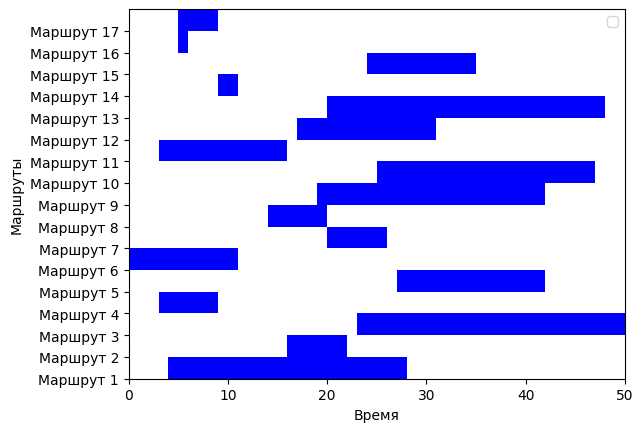

In [30]:
# Визуализация результатов
# Получение лучшего решения из генетического алгоритма
best_solution = ga_instance.best_solution()[0]


# Создание диаграммы Ганта
fig, ax = plt.subplots()

#for k in range(num_routes):
# Разделение генетической популяции на маршруты
routes = np.split(best_solution, num_routes, axis=0)
# Отрисовка полос для каждого маршрута
for i in range(len(routes)):
    # Получение текущего маршрута и его соответствующего имени судна
    current_route = routes[i]
    #vehicle_name = names[i]

    # Отрисовка полосы для текущего маршрута с указанием имени судна
    ax.broken_barh([(start_times[i], end_times[i] - start_times[i])], (i, 1), facecolors='blue')

# Настройка осей и меток
ax.set_ylim(0, len(routes))
ax.set_xlim(0, max(end_times))
ax.set_xlabel('Время')
ax.set_ylabel('Маршруты')
ax.set_yticks(range(len(routes)))
ax.set_yticklabels(['Маршрут {}'.format(i+1) for i in range(len(routes))])

# Добавление легенды на диаграмму
ax.legend()
    
# Отображение диаграммы Ганта
plt.show()

In [31]:
# Формирование данных для JSON
data = {
    "best_solutions": best_solution,
    "best_fitness": best_fitness
}

# Сериализация данных в JSON-строку
json_data = json.dumps(data)

# Отправка JSON-строки
# ...

NameError: name 'best_fitness' is not defined